In [2]:
import zipfile
import json
import pandas as pd
import glob
from pandas import json_normalize
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Abre el archivo zip y extrae todos los archivos
# Abre el archivo zip y extrae todos los archivos
with zipfile.ZipFile('C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\review-Pennsylvania-20240131T031118Z-001.zip' , 'r') as path:
    path.extractall('C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas')

In [6]:
# Ruta de la carpeta que contiene los archivos JSON
ruta_carpeta = 'C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\review-Pennsylvania'

# Crea una lista para almacenar los datos
datos_total = []

# Recorre cada archivo JSON en la carpeta
for nombre_archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
    # Leer cada linea de los archivos json
    if not os.path.isdir(ruta_archivo):
        # Leer cada linea de los archivos json
        with open(ruta_archivo, 'r') as f:
            for linea in f:
                # carga cada linea como un objeto Json individual
                datos_json = json.loads(linea)
                # agregar los datos a la lista
                datos_total.append(datos_json)

# Convierte los datos a un DataFrame y "desanida" los diccionarios
df_hawaii = json_normalize(datos_total)

# Desanida la columna 'resp'
if 'resp' in df_hawaii.columns:
    resp_desanidado = json_normalize(df_hawaii['resp'].dropna().tolist())
    resp_desanidado.index = df_hawaii['resp'].dropna().index
    df_hawaii = df_hawaii.drop(columns=['resp']).join(resp_desanidado)

# Ruta de salida para el archivo CSV
ruta_salida = 'C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\Pennsylvania.csv'

# Guarda el DataFrame en un archivo CSV
df_hawaii.to_csv(ruta_salida, index=False, escapechar='\\')

print(f'Se ha guardado el archivo CSV en: {ruta_salida}')


Se ha guardado el archivo CSV en: C:\Users\hp\Desktop\HENRY\Proyectos\PF_DATA\PF_Data_Science\datas\Pennsylvania.csv


In [11]:
# cargamos el archivo csv en un dataframe de pandas 
df_pennsylvania = pd.read_csv('C:\\Users\\hp\\Desktop\\HENRY\\Proyectos\\PF_DATA\\PF_Data_Science\\datas\\Pennsylvania.csv')

In [ ]:
# vemos las primeras lineas para comprobar que se haya cargado correctamente
df_pennsylvania.head()

,user_id,name,time,rating,text,pics,gmap_id,resp.time,resp.text
0,113965417079576625433,manuel grimaldo,1591839903487,5,Great new upgrade,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
1,116655819137293331166,Enrique Lara,1568059018979,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
2,100834119994550070853,Gregory Donaldson,1594885588335,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
3,103207214144482097315,Brian Baker,1575951131613,5,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN
4,108526171163172578599,Kam J,1573076723916,3,NaN,NaN,0x7c00159b5b1b1d25:0x8d2d85d4a758290e,NaN,NaN


In [12]:
# consultamos la informacion de nuestro DF 
df_pennsylvania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   name       object 
 2   time       int64  
 3   rating     int64  
 4   text       object 
 5   pics       object 
 6   gmap_id    object 
 7   resp.time  float64
 8   resp.text  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.8+ MB


In [13]:
# contamos la cantidad de nulos en cda columna 
df_pennsylvania.isnull().sum()

user_id            0
name               4
time               0
rating             0
text         1041423
pics         2342190
gmap_id            0
resp.time    2099889
resp.text    2099889
dtype: int64

In [14]:
# revisamos la cantidad de fila duplicadas en el dataset
print(f'la cantidad de filas duplicadas es:', df_pennsylvania.duplicated().sum())

la cantidad de filas duplicadas es: 33568


In [15]:

# contamos la cantidad de reseñas de cada usuario 
df_pennsylvania.groupby(['user_id'])['name'].count()

user_id
100000040679890844481    8
100000047077967550299    2
100000051920540931617    1
100000055127995370252    7
100000058415937849870    8
                        ..
118446578128680462285    3
118446619268513355798    3
118446635026597557536    2
118446683373538778663    5
118446712393208525484    3
Name: name, Length: 402953, dtype: int64

In [16]:
# revisamos que usuarios no tienen nombre 
df_pennsylvania[df_pennsylvania['name'].isnull()]

,user_id,name,time,rating,text,pics,gmap_id,resp.time,resp.text
253454,116097772843381852351,NaN,1499963588430,4,NaN,NaN,0x89c88b786d1269d1:0x22f251e133d06880,NaN,NaN
620266,116097772843381852351,NaN,1499963631568,4,NaN,NaN,0x89c88c02fefd40bf:0x3e03595edc9431f5,NaN,NaN
695394,116097772843381852351,NaN,1488465067688,4,NaN,NaN,0x89c88b862ef04963:0xd65e876b0d3fb363,NaN,NaN
1121350,100767368194671158231,NaN,1470064078768,4,"A pretty expansive grocery store, offers a stu...",NaN,0x89c6e82ccf3638a1:0x86f80eb9b29f4670,NaN,NaN


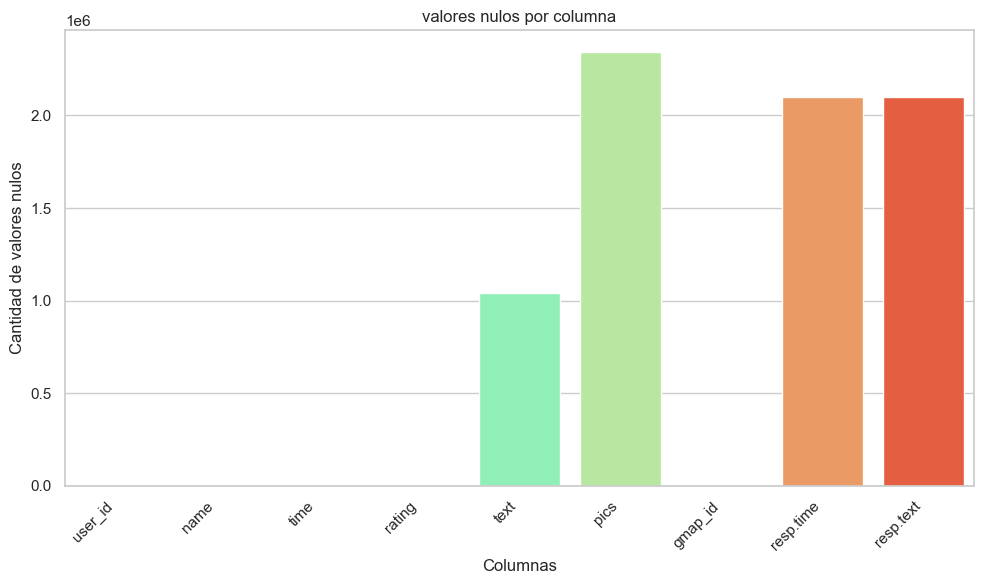

In [17]:
# Calcular el número de valores nulos en cada columna
nulos = df_pennsylvania.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='rainbow')
plt.title('valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cantidad significativa de datos nulos en las columnas "text, pics, resp.time, resp.text" esto puede ser debido a que al publicar una reseña son datos que el usuario puede omitir y no se les asigna un valor por defecto.

In [18]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_pennsylvania)
# Calcular el número de valores nulos en cada columna
nulos = df_pennsylvania.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

porcentaje_nulos

user_id       0.000000
name          0.000167
time          0.000000
rating        0.000000
text         43.392625
pics         97.591250
gmap_id       0.000000
resp.time    87.495375
resp.text    87.495375
dtype: float64

In [19]:
# Convertir la columna 'time' a formato de fecha y hora
df_pennsylvania['time'] = pd.to_datetime(df_pennsylvania['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_pennsylvania['fecha'] = df_pennsylvania['time'].dt.strftime('%d/%m/%Y')

df_pennsylvania = df_pennsylvania.drop(['time'], axis=1)

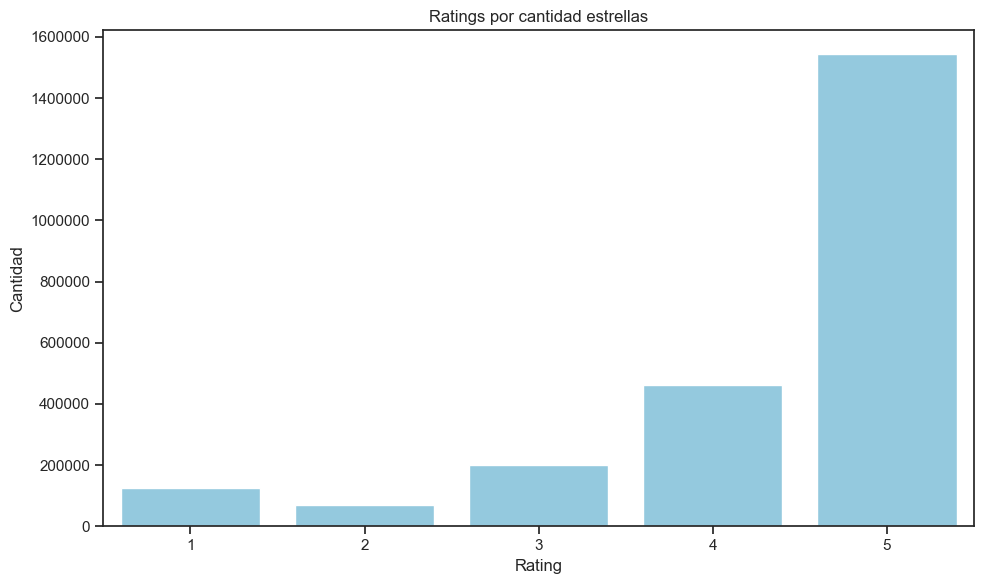

In [20]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pennsylvania, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Podemos observar en este grafico de los raiting en el estado de Pennsylvania que hay una poredominancia de 5 estrellas: La barra correspondiente a la calificación de 5 estrellas es significativamente más alta que las demás, indicando que una gran mayoría de los usuarios dio esta calificación máxima. Esto sugiere una alta satisfacción general entre los usuarios.

Bajas calificaciones (1 y 2 estrellas): Las barras para las calificaciones de 1 y 2 estrellas son relativamente bajas en comparación con las calificaciones más altas. Esto indica que una pequeña proporción de usuarios dio estas calificaciones bajas.

Calificaciones intermedias (3 y 4 estrellas): Las calificaciones de 3 y 4 estrellas también son relativamente bajas en comparación con las de 5 estrellas, pero son más altas que las de 1 y 2 estrellas. Esto sugiere que una proporción moderada de usuarios considera que el servicio/producto es bueno pero no excelente.
En general, parece que la mayoría de los usuarios están muy satisfechos con el servicio/producto evaluado

<Figure size 1500x1000 with 0 Axes>

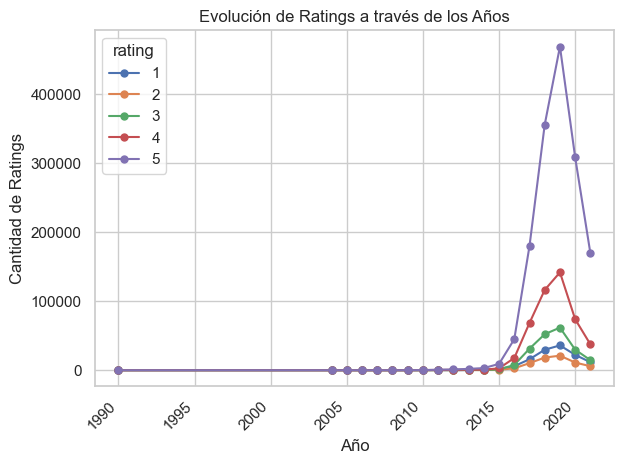

In [21]:
# Extraer el año de la columna 'fecha'
df_pennsylvania['year'] = pd.to_datetime(df_pennsylvania['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_pennsylvania.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico muestra la evolución de los ratings a lo largo de los años.

Rating 1 (línea azul): Esta línea muestra un pico significativo alrededor del año 2015 y otro en 2020. Esto podría indicar un aumento en la cantidad de usuarios insatisfechos durante estos años.

Ratings 2 (naranja) y 3 (verde): Estos ratings muestran cambios mínimos a lo largo de los años, con ligeros aumentos alrededor del año 2015. Esto podría sugerir que la cantidad de usuarios que dan estos ratings ha permanecido relativamente constante.

Rating 4 (rojo): Este rating muestra un aumento a partir del año 2010, alcanzando su punto máximo entre los años 2013 y 2018 antes de disminuir bruscamente. Esto podría indicar un cambio en la percepción de los usuarios durante este período.

Rating 5 (púrpura): Esta línea permanece constante en cero hasta que muestra dos picos dramáticos alrededor de los años 2015 y 2020. Esto sugiere que hubo un aumento significativo en la cantidad de usuarios que dieron la calificación máxima durante estos años.

En general, parece que la percepción de los usuarios ha variado a lo largo de los años, con cambios notables en las calificaciones de 1, 4 y 5 estrellas

incluso como conclusion genera la disminucion en la cantidad de reseñas para el año 2020 pudo ser debido a la pandemia global que dio inicio a finales del año 2020 

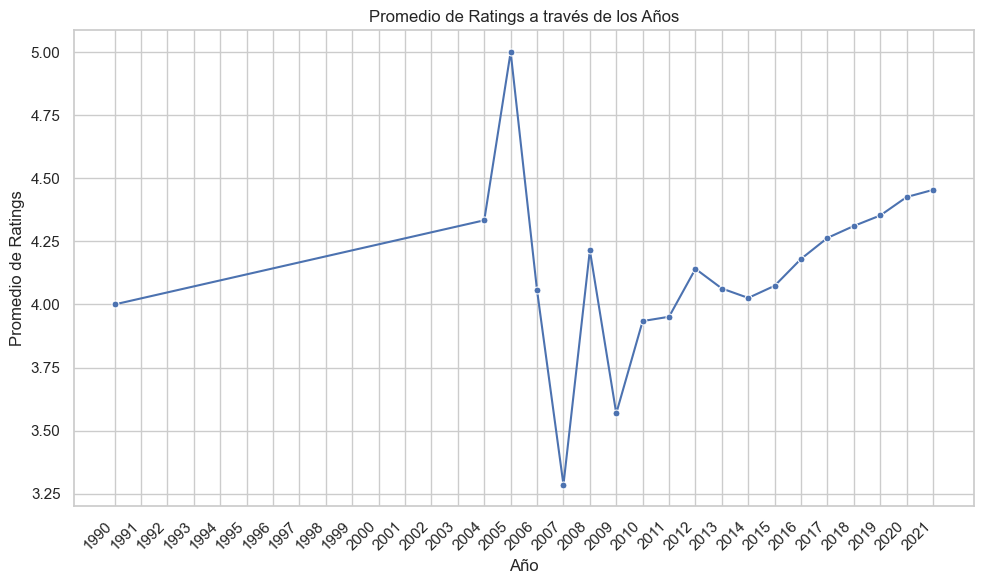

In [22]:
# Extraer el año de la columna 'fecha'
df_pennsylvania['year'] = pd.to_datetime(df_pennsylvania['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_pennsylvania.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico muestra la evolución del promedio de ratings a lo largo de los años. Aquí hay algunos puntos clave que podrían ayudarte a formular una conclusión:

Tendencia general: La línea del gráfico muestra una tendencia general al alza, lo que indica que el promedio de ratings ha aumentado con el tiempo. Esto podría sugerir una mejora en la calidad del servicio/producto evaluado o un cambio en la percepción de los usuarios.

Caída entre 2004 y 2007: Hay una caída significativa en el promedio de ratings entre los años 2002 y 2006. Esto podría indicar un problema con el servicio/producto durante ese período o un cambio en la forma en que los usuarios proporcionaban sus ratings.

Aumento después de 2007: Después de la caída entre 2004 y 2007, el promedio de ratings aumentó de manera constante hasta 2021. Esto podría indicar una mejora continua en la calidad del servicio/producto o un cambio en las expectativas de los usuarios.

tambien se observa un dato atipico en el año de 1990 qdebido a que en esa epoca npo existia una plataforma para poder brindar una recomendacion 

In [23]:
# Extraer el año de la columna 'fecha'
df_pennsylvania['year'] = pd.to_datetime(df_pennsylvania['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_pennsylvania.groupby('year').size()
# Mostrar el resultado
df_reviews = pd.DataFrame(reviews_per_year)

df_reviews

,0
year,
1990,1
2004,3
2005,1
2006,18
2007,7
2008,42
2009,88
2010,515
2011,1575
